In [68]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [69]:
vehicles_df = pd.read_csv('vehicles_us.csv')
display(vehicles_df)
display(vehicles_df.info())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

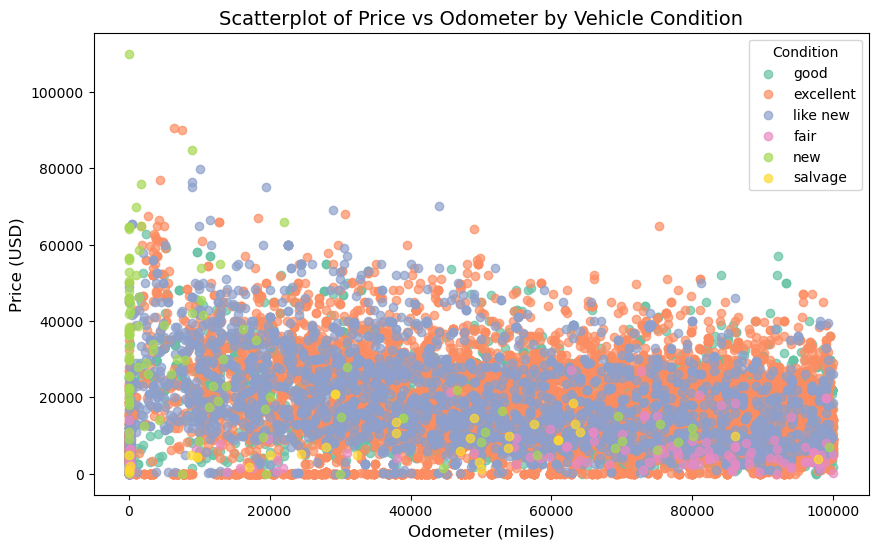

In [70]:
vehicles_df['model_year'] = vehicles_df['model_year'].fillna('Not Available').astype(str)
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].fillna('0.0')
vehicles_df['paint_color'] = vehicles_df['paint_color'].fillna('Not Available')

filter_odometer_df = vehicles_df[vehicles_df['odometer'] < 100000]
conditions = filter_odometer_df['condition'].unique()
colors = plt.cm.Set2(range(len(conditions)))
condition_to_color = dict(zip(conditions, colors))

plt.figure(figsize=(10, 6))

for condition in conditions:
    subset = filter_odometer_df[filter_odometer_df['condition'] == condition]
    plt.scatter(subset['odometer'], subset['price'],
                color=condition_to_color[condition],
                label=condition,
                alpha=0.7)
    
plt.title('Scatterplot of Price vs Odometer by Vehicle Condition', fontsize=14)
plt.xlabel('Odometer (miles)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

plt.legend(title='Condition')

plt.show()